<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


# Расчёт эффективности

Hужно смоделировать процесс восстановления золота из золотосодержащей руды.


Эффективность обогащения рассчитывается по формуле


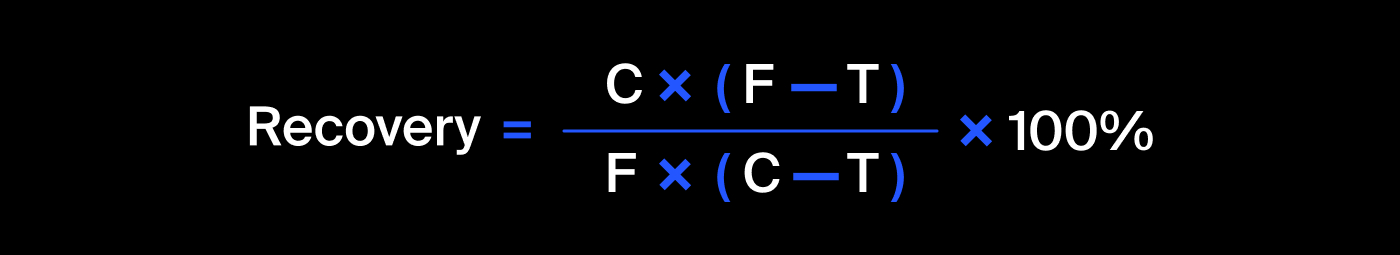

In [2]:
from IPython.display import Image
print('Эффективность обогащения рассчитывается по формуле')
display(Image("https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg", width=660, height=620))

где:
* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

# Метрика качества

Для решения задачи необходима метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных. Почему симметричная? Она одинаково учитывает масштаб и целевого признака, и предсказания.

Метрика sMAPE вычисляется так:


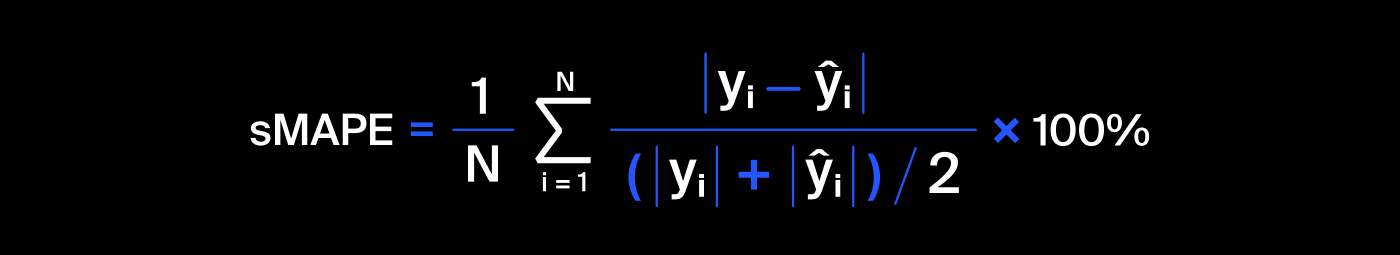

In [3]:
print('Метрика sMAPE вычисляется так:')
display(Image("https://pictures.s3.yandex.net/resources/smape_1576239058.jpg", width=660, height=620))

где:

- y(i) - Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество;
- y^(i) - Значение предсказания для объекта с порядковым номером i, например, в тестовой выборке;
- N - Количество объектов в выборке.
- ∑ -Суммирование по всем объектам выборки (i меняется от 1 до N).

Нужно спрогнозировать сразу две величины:
* эффективность обогащения чернового концентрата rougher.output.recovery;
* эффективность обогащения финального концентрата final.output.recovery.


Итоговая метрика складывается из двух величин:


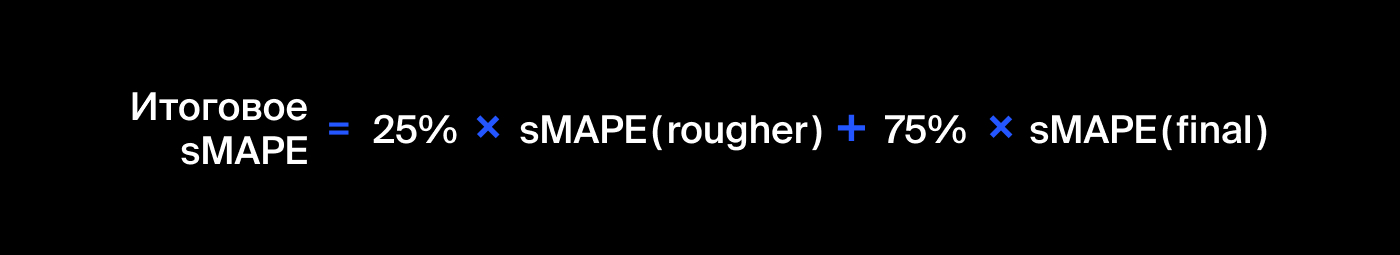

In [4]:
print('Итоговая метрика складывается из двух величин:')
Image("https://pictures.s3.yandex.net/resources/_smape_1576239054.jpg", width=660, height=620) 

**Данные находятся в трёх файлах:**

- gold_industry_train.csv — обучающая выборка;
- gold_industry_test.csv — тестовая выборка;
- gold_industry_full.csv — исходные данные.

**Путь к файлам:**

- /datasets/gold_industry_train.csv
- /datasets/gold_industry_test.csv
- /datasets/gold_industry_full.csv

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. 


**Описание данных:**

**Технологический процесс**
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

**Параметры этапов**
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

**Наименование признаков**

[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag


**Значения для блока [этап]:**
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

**Значения для блока [тип_параметра]:**
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

## Подготовка данных

Загрузим необходимые библиотеки

In [5]:
!pip install skimpy -q

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, make_scorer
from sklearn.datasets import load_diabetes

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from skimpy import clean_columns 

from sklearn.pipeline import Pipeline
#warnings.filterwarnings('ignore')

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
state = np.random.RandomState(12345)
TARGETS = ['rougher_output_recovery', 'final_output_recovery']

Загрузим датасеты

In [8]:
df_train = pd.read_csv('/datasets/gold_industry_train.csv')
df_test = pd.read_csv('/datasets/gold_industry_test.csv')
df_full = pd.read_csv('/datasets/gold_industry_full.csv')

Познакомимся с данными

In [9]:
display(df_train.head(3))
display(df_test.head(3))
display(df_full.head(3))

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849


In [10]:
display(df_train.info())
display(df_test.info())
display(df_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


None

В данных явно есть пропущенные значения и колонки в верблюжем стиле. Необходима предобработка данных. 
Приведём названия столбцов к единому виду

In [11]:
df_train = clean_columns(df_train)
df_test = clean_columns(df_test)
df_full = clean_columns(df_full)

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher_output_recovery. 

In [12]:
calculated_recovery = ((df_train['rougher_output_concentrate_au'] 
                       * (df_train['rougher_input_feed_au'] - df_train['rougher_output_tail_au'])
                       )
                        /
                        (df_train['rougher_input_feed_au'] 
                        * (df_train['rougher_output_concentrate_au'] - df_train['rougher_output_tail_au'])
                        )
                        * 100
                       )
calculated_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Length: 14579, dtype: float64

Найдем MAE между полученными расчётами и значением признака.

In [13]:
print('Абсолютная средняя ошибка =', mean_absolute_error(df_train['rougher_output_recovery'], calculated_recovery))

Абсолютная средняя ошибка = 9.83758577644259e-15


MAE имеет очень малое отклонение - это значит, что расчетное значение rougher.output.recovery совпадает с исходными данными .

**Предобработка данных**

Добавим целевые показатели в датасет df_test из датасета df_full, в качестве ключа использовав date

In [14]:
print(df_test.shape)
df_test[['rougher_output_recovery', 'final_output_recovery']] = df_full[['rougher_output_recovery', 
                                                                         'final_output_recovery'
                                                                        ]].loc[df_test.index]
#df_test = df_test.merge(df_full[[TARGETS],'date'].loc[df_test.index], on='date', how='left')
#df_test = df_test.merge(df_full[TARGETS].loc[df_test.index], on='date', how='left')

print(df_test.shape)

(4860, 53)
(4860, 55)


Проверим данные на дубликаты и пропуски.

In [15]:
def exploratory(data):
    print(f"Размер данных: {data.shape}")
    print("Пропуски: ", data.isna().sum().sum())
    print("Дубликаты: ", data.duplicated().sum())
    print("Посладовательность индексации: ", data.index.is_monotonic_increasing)

In [16]:
exploratory(df_train)
exploratory(df_test)
exploratory(df_full)

Размер данных: (14579, 87)
Пропуски:  3050
Дубликаты:  0
Посладовательность индексации:  True
Размер данных: (4860, 55)
Пропуски:  375
Дубликаты:  0
Посладовательность индексации:  True
Размер данных: (19439, 87)
Пропуски:  4481
Дубликаты:  0
Посладовательность индексации:  True


Дубликатов нет, пропусков много в каждом из датафреймов.

Бросается в глаза разный обьем данных в исходных выборках. 
Тестовая выборка значимо меньше обучающей. Возможно, это связано с тем, что технологический процесс еще не окончен, и не все данные измерены.

 Рассмотрим ключевые столбцы в обучающей выборки.

In [17]:
df_train.isnull().sum().sort_values(ascending=False)

secondary_cleaner_output_tail_sol              920
rougher_state_floatbank_10_e_air               429
rougher_input_floatbank_11_xanthate            407
primary_cleaner_output_concentrate_sol         265
final_output_concentrate_sol                   192
                                              ... 
secondary_cleaner_state_floatbank_5_b_level      0
final_output_recovery                            0
final_output_tail_au                             0
rougher_input_feed_au                            0
date                                             0
Length: 87, dtype: int64

В столбце 'secondary_cleaner_output_tail_sol' максимально количество пропусков 920. 
В столбцах 'rougher_state_floatbank_10_e_air' и 'rougher_input_floatbank_11_xanthate'так же большое количество пропусков 429 и 407 - 5,7%. Слишком много данных для удаления, обработаем их. Закономерности в данных с пропущенными значениями есть, они все непосредственно связаны с технологическим процессом и расположены последовательно в соответствии с ним. В техзадании недвусмысленно сказано, что "соседние" параметры похожи. Заполнения ffill/bfill -  используя сосдение значения, будут корректны в этом случае.

In [18]:
df_train = df_train. fillna(method='ffill')
df_test = df_test. fillna(method='ffill')
f_full = df_test. fillna(method='ffill')

/tmp/ipykernel_79/3129485040.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train = df_train. fillna(method='ffill')
/tmp/ipykernel_79/3129485040.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test = df_test. fillna(method='ffill')
/tmp/ipykernel_79/3129485040.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  f_full = df_test. fillna(method='ffill')


In [19]:
print("\n Статистика по столбцам:")
df_train.describe().T


 Статистика по столбцам:


,count,mean,std,min,25%,50%,75%,max
rougher_input_feed_au,14579.0,8.352941,1.934376,0.010000,6.932996,8.225284,9.832210,13.731330
rougher_input_feed_ag,14579.0,8.877460,1.922536,0.010000,7.341922,8.715859,10.255843,14.596026
rougher_input_feed_pb,14579.0,3.592094,1.068227,0.010000,2.868687,3.524599,4.253958,7.052325
rougher_input_feed_sol,14579.0,36.545646,5.221540,0.010000,34.076253,37.091668,39.885734,53.475325
rougher_input_feed_rate,14579.0,474.284502,108.540067,0.002986,411.020607,498.144696,549.576867,717.508837
...,...,...,...,...,...,...,...,...
final_output_recovery,14579.0,66.759066,10.619709,0.000000,63.114596,67.962788,72.598187,100.000000
final_output_tail_au,14579.0,3.087939,0.915187,0.000000,2.505287,3.029238,3.614098,8.245022
final_output_tail_ag,14579.0,9.731833,2.358121,0.000000,8.088542,9.818342,11.169027,19.552149
final_output_tail_pb,14579.0,2.709444,0.967967,0.000000,2.024191,2.770067,3.351658,5.804178


Явных загрязнений в тренировочных данных нет. Максимальные значения коррелируются с основным обьемом данных. Вызывают вопросы нулевые концентрации основных элементов.  

Напишем функцию для расчета того, сколько нулевых  и кретически малых значений данных в датасете.

In [20]:
def print_zero(df):
    print(df.isin(range(0,1)).sum().sort_values(ascending=False) )

In [21]:
print_zero(df_train)

secondary_cleaner_output_tail_sol                      804
secondary_cleaner_output_tail_au                       727
secondary_cleaner_output_tail_ag                       727
secondary_cleaner_output_tail_pb                       727
rougher_output_concentrate_sol                         397
                                                      ... 
rougher_calculation_floatbank_10_sulfate_to_au_feed      0
rougher_calculation_sulfate_to_au_concentrate            0
rougher_input_floatbank_11_xanthate                      0
rougher_input_floatbank_11_sulfate                       0
rougher_output_tail_sol                                  0
Length: 87, dtype: int64


In [22]:
df_train.query('secondary_cleaner_output_tail_ag <= 0')

,date,rougher_input_feed_au,rougher_input_feed_ag,rougher_input_feed_pb,rougher_input_feed_sol,rougher_input_feed_rate,rougher_input_feed_size,rougher_input_floatbank_10_sulfate,rougher_input_floatbank_10_xanthate,rougher_state_floatbank_10_a_air,...,secondary_cleaner_output_tail_sol,final_output_concentrate_au,final_output_concentrate_ag,final_output_concentrate_pb,final_output_concentrate_sol,final_output_recovery,final_output_tail_au,final_output_tail_ag,final_output_tail_pb,final_output_tail_sol
61,2016-01-17 15:00:00,7.103887,7.844640,2.653501,38.767396,616.710761,65.729426,14.723131,7.501458,1002.325843,...,0.0,43.264258,4.821388,10.235502,1.581066,84.687443,1.263480,5.520487,0.821232,9.264695
62,2016-01-17 16:00:00,7.121792,7.622043,2.618408,39.490905,595.469733,65.696424,14.495708,7.493563,997.081324,...,0.0,46.543285,4.392827,10.611895,3.769994,100.000000,0.000000,0.000000,0.000000,0.000000
104,2016-01-21 00:00:00,9.374748,10.845282,4.198145,41.202828,614.154707,67.373743,15.977521,7.804934,1000.764555,...,0.0,42.601096,6.164771,11.585627,10.228155,65.868895,3.742128,12.046762,2.444643,16.478456
912,2016-02-25 10:00:00,4.280841,6.964654,1.316729,26.852126,549.704208,57.954416,9.997787,6.994193,999.816017,...,0.0,43.131455,4.962936,10.045186,3.975607,60.257491,1.809535,10.094195,0.870124,17.675953
913,2016-02-25 11:00:00,4.171674,6.930101,1.391895,27.423050,550.052836,58.782153,10.002462,6.996805,999.864007,...,0.0,43.306838,5.090707,10.294071,3.975607,62.060535,1.683344,10.276145,0.906560,17.638330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14574,2017-12-09 09:59:59,4.599524,5.822083,4.255546,37.480479,559.895089,85.247019,6.775864,9.005425,1200.454685,...,0.0,47.765393,2.925574,10.855586,7.053796,64.054699,1.761994,8.578502,3.365823,10.603464
14575,2017-12-09 10:59:59,4.658125,5.844800,4.241564,37.395565,561.464855,83.860651,6.770561,9.000889,1200.958146,...,0.0,46.956275,3.076566,11.542302,6.929418,68.643324,1.567363,8.792890,3.120351,10.184715
14576,2017-12-09 11:59:59,5.335862,6.091855,4.617558,37.369774,560.889077,85.718304,7.762770,9.158609,1199.245914,...,0.0,46.713954,3.224920,11.356233,6.803482,73.755150,1.529220,8.769645,3.141541,10.403181
14577,2017-12-09 12:59:59,4.838619,6.121323,4.144989,38.591551,559.031805,119.499241,7.356687,9.304952,1196.569267,...,0.0,46.866780,3.195978,11.349355,6.862249,69.049291,1.612542,8.897321,3.130493,10.549470


Самое большое количество нулевых значений в данных  параметра продукта флотации и вторичной очистки. Ошибочных данных не так много - менее 5%. Можем их удалить.

In [23]:
df_train = df_train.loc[(df_train['secondary_cleaner_output_tail_sol'] != 0) &
                         (df_train['rougher_output_concentrate_sol'] != 0) &
                         (df_train['primary_cleaner_output_tail_sol'] != 0) &
                         (df_train['primary_cleaner_output_concentrate_sol'] != 0) &
                         (df_train['final_output_concentrate_au'] != 0) &
                         (df_train['final_output_tail_pb'] != 0) &
                         (df_train['secondary_cleaner_state_floatbank_3_a_air'] != 0) &
                         (df_train['primary_cleaner_input_depressant'] != 0) 
                        ]
                       

print_zero(df_train)

final_output_tail_sol                 0
date                                  0
rougher_input_feed_au                 0
rougher_input_feed_ag                 0
rougher_input_feed_pb                 0
                                     ..
rougher_state_floatbank_10_a_level    0
rougher_state_floatbank_10_b_air      0
rougher_state_floatbank_10_b_level    0
rougher_state_floatbank_10_c_air      0
rougher_state_floatbank_10_c_level    0
Length: 87, dtype: int64


In [24]:
print_zero(df_test)

rougher_output_recovery                        96
final_output_recovery                          24
primary_cleaner_input_depressant                1
secondary_cleaner_state_floatbank_2_b_air       1
date                                            0
rougher_input_feed_au                           0
rougher_input_feed_ag                           0
rougher_input_floatbank_10_sulfate              0
rougher_input_floatbank_10_xanthate             0
rougher_state_floatbank_10_a_air                0
rougher_state_floatbank_10_a_level              0
rougher_state_floatbank_10_b_air                0
rougher_state_floatbank_10_b_level              0
rougher_state_floatbank_10_c_air                0
rougher_state_floatbank_10_c_level              0
rougher_state_floatbank_10_d_air                0
rougher_state_floatbank_10_d_level              0
rougher_state_floatbank_10_e_air                0
rougher_state_floatbank_10_e_level              0
rougher_input_feed_pb                           0


In [25]:
df_test = df_test.loc[(df_test['rougher_output_recovery'] != 0) &
                      (df_test['final_output_recovery'] != 0) &
                      (df_test['primary_cleaner_input_depressant'] != 0) &
                      (df_test['secondary_cleaner_state_floatbank_2_b_air'] != 0)
                     ]
print_zero(df_test)

date                                           0
rougher_input_feed_au                          0
rougher_input_feed_ag                          0
rougher_input_feed_pb                          0
rougher_input_feed_sol                         0
rougher_input_feed_rate                        0
rougher_input_feed_size                        0
rougher_input_floatbank_10_sulfate             0
rougher_input_floatbank_10_xanthate            0
rougher_state_floatbank_10_a_air               0
rougher_state_floatbank_10_a_level             0
rougher_state_floatbank_10_b_air               0
rougher_state_floatbank_10_b_level             0
rougher_state_floatbank_10_c_air               0
rougher_state_floatbank_10_c_level             0
rougher_state_floatbank_10_d_air               0
rougher_state_floatbank_10_d_level             0
rougher_state_floatbank_10_e_air               0
rougher_state_floatbank_10_e_level             0
rougher_state_floatbank_10_f_air               0
rougher_state_floatb

In [26]:
print_zero(df_full)

secondary_cleaner_output_tail_au                       849
secondary_cleaner_output_tail_ag                       849
secondary_cleaner_output_tail_pb                       849
secondary_cleaner_output_tail_sol                      849
rougher_output_concentrate_au                          394
                                                      ... 
rougher_calculation_floatbank_10_sulfate_to_au_feed      0
rougher_calculation_sulfate_to_au_concentrate            0
rougher_input_floatbank_11_xanthate                      0
rougher_input_floatbank_11_sulfate                       0
rougher_output_tail_sol                                  0
Length: 87, dtype: int64


In [27]:
df_full = df_full.loc[(df_full['secondary_cleaner_output_tail_au'] != 0) &
                      (df_full['primary_cleaner_output_tail_au'] != 0) &
                      (df_full['final_output_concentrate_au'] != 0) &
                      (df_full['primary_cleaner_output_concentrate_sol'] > 0.01) &
                      (df_full['primary_cleaner_input_depressant'] != 0) &
                      (df_full['final_output_tail_au'] != 0) &
                      (df_full['rougher_output_concentrate_au'] != 0)
                     ]
print_zero(df_full)

final_output_tail_sol                 0
date                                  0
rougher_input_feed_au                 0
rougher_input_feed_ag                 0
rougher_input_feed_pb                 0
                                     ..
rougher_state_floatbank_10_a_level    0
rougher_state_floatbank_10_b_air      0
rougher_state_floatbank_10_b_level    0
rougher_state_floatbank_10_c_air      0
rougher_state_floatbank_10_c_level    0
Length: 87, dtype: int64


In [28]:
print(df_train.shape)
print(df_test.shape)
print(df_full.shape)

(13107, 87)
(4740, 55)
(17894, 87)


# Анализ признаков, недоступных в тестовой выборке

Найдем те столбцы, которые не вошли в тестовую выборку.

In [29]:
A = df_train.columns
B = df_test.columns
Bset = frozenset(B)
C = [item for item in A if item not in Bset]  # C = A - B
C

['rougher_calculation_sulfate_to_au_concentrate',
 'rougher_calculation_floatbank_10_sulfate_to_au_feed',
 'rougher_calculation_floatbank_11_sulfate_to_au_feed',
 'rougher_calculation_au_pb_ratio',
 'rougher_output_concentrate_au',
 'rougher_output_concentrate_ag',
 'rougher_output_concentrate_pb',
 'rougher_output_concentrate_sol',
 'rougher_output_tail_au',
 'rougher_output_tail_ag',
 'rougher_output_tail_pb',
 'rougher_output_tail_sol',
 'primary_cleaner_output_concentrate_au',
 'primary_cleaner_output_concentrate_ag',
 'primary_cleaner_output_concentrate_pb',
 'primary_cleaner_output_concentrate_sol',
 'primary_cleaner_output_tail_au',
 'primary_cleaner_output_tail_ag',
 'primary_cleaner_output_tail_pb',
 'primary_cleaner_output_tail_sol',
 'secondary_cleaner_output_tail_au',
 'secondary_cleaner_output_tail_ag',
 'secondary_cleaner_output_tail_pb',
 'secondary_cleaner_output_tail_sol',
 'final_output_concentrate_au',
 'final_output_concentrate_ag',
 'final_output_concentrate_pb',
 

В тестовой выборке отсуствуют столбцы этапов rougher.output, rougher.calculation, final.output, primary_cleaner.output и secondary_cleaner.output. Признаки output - целевые признаки и поэтому отсутствуют в тестовой выборке. Признаки rougher.calculation - это расчетные характеристики и отсутвуют они скорее всего из-за того, что они расчитываются после завершения процесса.

Это онлайн метрики. Остальные столбцы известны - значит это офлайн метрики.

Удалим полученные столбцы из тренировочной выборки. Столбец "data" так же не несет смысла для обучающей модели. 

In [30]:
df_short_train = df_train.drop(labels = C , axis=1, inplace = False).copy()
df_short_train = df_short_train.drop(['date'], axis=1)
df_short_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13107 entries, 0 to 14572
Data columns (total 54 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   rougher_input_feed_au                        13107 non-null  float64
 1   rougher_input_feed_ag                        13107 non-null  float64
 2   rougher_input_feed_pb                        13107 non-null  float64
 3   rougher_input_feed_sol                       13107 non-null  float64
 4   rougher_input_feed_rate                      13107 non-null  float64
 5   rougher_input_feed_size                      13107 non-null  float64
 6   rougher_input_floatbank_10_sulfate           13107 non-null  float64
 7   rougher_input_floatbank_10_xanthate          13107 non-null  float64
 8   rougher_state_floatbank_10_a_air             13107 non-null  float64
 9   rougher_state_floatbank_10_a_level           13107 non-null  float64
 10  rou

Разделим столбцы тренировочной выборки, по которым будет обучаться модель. 

* Для предсказания эффективности обогащения чернового концентрата "rougher_output_recovery" будут использоватся данные из стобцов этапа "rougher".
* Для вычисления эффективности обогащения финального концентрата "final_output_recovery" будут использованы все данные .

In [31]:
X_train = df_short_train.drop(TARGETS, axis='columns')
target_train = df_short_train[TARGETS]

print(X_train.shape)
print(target_train.shape)
#display(features_train.info())
#print(target_train.info())

(13107, 52)
(13107, 2)


Подготовим признаки тестовой выборки.

In [32]:
df_test = df_test.drop('date', axis=1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4740 entries, 0 to 4859
Data columns (total 54 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   rougher_input_feed_au                        4740 non-null   float64
 1   rougher_input_feed_ag                        4740 non-null   float64
 2   rougher_input_feed_pb                        4740 non-null   float64
 3   rougher_input_feed_sol                       4740 non-null   float64
 4   rougher_input_feed_rate                      4740 non-null   float64
 5   rougher_input_feed_size                      4740 non-null   float64
 6   rougher_input_floatbank_10_sulfate           4740 non-null   float64
 7   rougher_input_floatbank_10_xanthate          4740 non-null   float64
 8   rougher_state_floatbank_10_a_air             4740 non-null   float64
 9   rougher_state_floatbank_10_a_level           4740 non-null   float64
 10  rough

In [33]:
X_test  = df_test.drop(TARGETS, axis='columns')

target_test = df_test[TARGETS]

print(X_test.shape)
print(target_test.shape)

(4740, 52)
(4740, 2)


In [34]:
# Применяем StandardScaler только к числовым признакам

features_train = X_train.copy().reset_index(drop=True)
features_test = X_test.copy().reset_index(drop=True)


scaler = StandardScaler()
scaler.fit(X_train)
features_train = scaler.transform(X_train)
features_test = scaler.transform(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


**Вывод**

Данные загружены и готовы к обучению.

Проверено, что эффективность обогащения рассчитана правильно. Вычислена её на обучающей выборке для признака rougher.output.recovery. Абсолютная средняя ошибка равна минимальному значению в 9.83758577644259e-15, что подтверждает данные.

Проанализированы обьемы данных в тестировочном и обучающем датафреймах, изучены сами данные.В тестовой выборке отсуствуют столбцы этапов rougher.output, rougher.calculation, final.output, primary_cleaner.output и secondary_cleaner.output. Эти данные имеют линейную зависимость с первичными данными и будут получены по результатам технологического процесса. Они могут исказить модель и ,поэтому были удалены. Возможно такие данные не были сняты по выбранным этапам или они еще не были получены в результате работы системы.

Обработаны пропущенные значения в данных. Удалены 8% некорректных данных.

Данные готовы к дальнейшему анализу.

## Анализ данных

Рассмотрим, как изменяется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

- Au - золото
- Ag - серебро
- Pb - свинец

Данные концентраций по этапу "secondary_cleaner" представлены в финальных концентрациях.

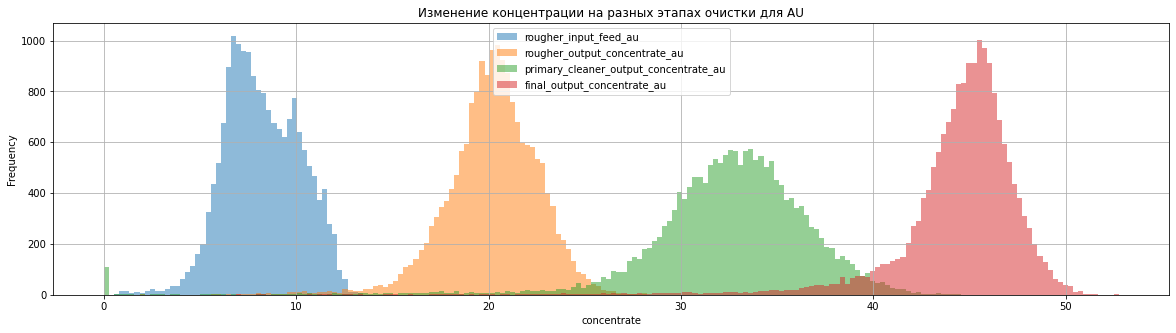

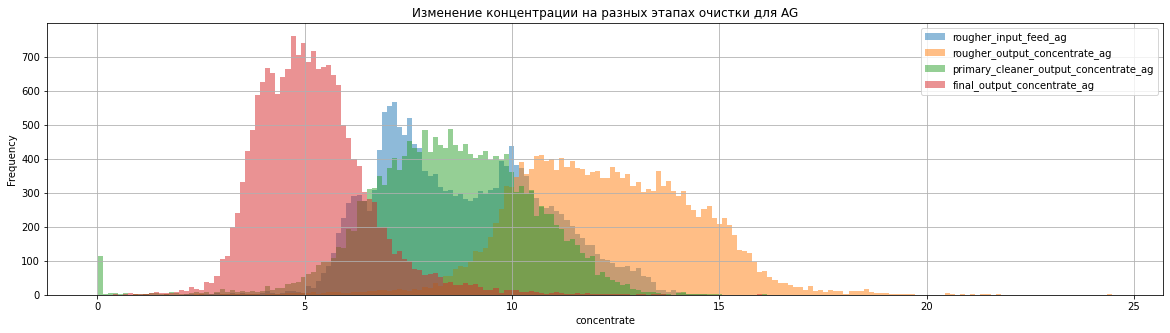

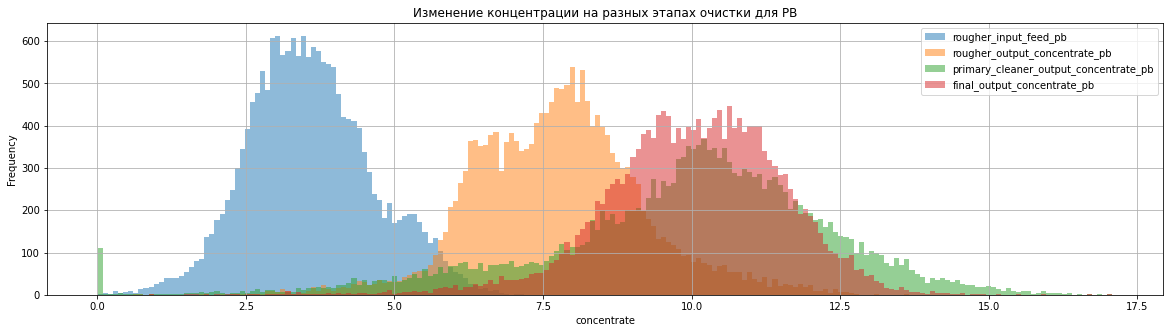

In [35]:
CONCENTRATE_METRICS = ['rougher_input_feed',
                       'rougher_output_concentrate',
                       'primary_cleaner_output_concentrate',
                       'final_output_concentrate'
                      ]
METALS = ['au', 'ag', 'pb']
for metal in METALS:
    metrics = ['{}_{}'.format(x, metal) for x in CONCENTRATE_METRICS]

    df_full[metrics].plot(title = 'Изменение концентрации на разных этапах очистки для {}'.format(metal.upper()),
                          kind='hist', 
                          bins=200, 
                          grid=True, 
                          legend=True,
                          figsize=(20, 5),
                          alpha=0.5,
                         ).set(xlabel='concentrate') 
    
    plt.show()

Концентрация Au золота повышается с каждым этапом. Цель флотации и очисток увеличить концентрацию золота.

Конецентрация Ag серебра понижается с каждым шагом очистки. Так как основным благородным металом является золото, то остальные металлы и соединения должны быть отфильтрованы.

Концентрация Pb свинца повышается с этапа rougher до primary_cleaner.А после усредняется. Это связано с химическим процесами очищения золота. При использование азотнокислого выщелачивания в концентрате образуется много сульфата свинца. Повышение концентрации свинца в целом происходит не только из-за этого процесса, но из-за очищения других составляющих из золотоносной руды.

**Сравним распределение размеров гранул исходного сырья  "feed size" на обучающей и тестовой выборках.** 

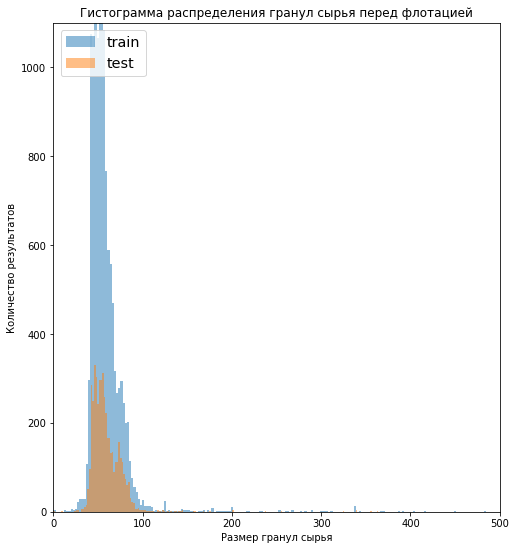

In [36]:
plt.figure(figsize=[8,9])

plt.hist(df_short_train['rougher_input_feed_size'], bins=200, label = 'train', alpha=.5)
plt.hist(df_test['rougher_input_feed_size'], bins=200, label = 'test', alpha=.5)

plt.xlim([0, 500])
plt.ylim([0, 1100])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед флотацией")
plt.show()

Распределение гранул  похоже на нормальное со смещением влево как в обучающей, так и в тестовой выбрке. Об этоим нам говорит характерная симметричность  и один выраженный пик.Существует много выбросов после размера гранул 110.

In [37]:
df_short_train = df_short_train.loc[df_short_train['rougher_input_feed_size'] <= 110]
df_test = df_test.loc[df_test['rougher_input_feed_size'] <= 110]

Проверим, подчиняются ли закону нормального  распределения данные о размерах гранул сырья.

<function matplotlib.pyplot.show(close=None, block=None)>

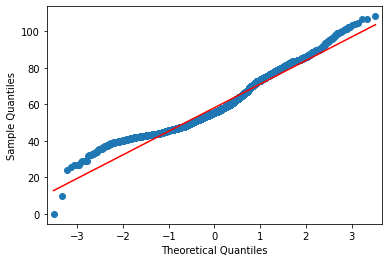

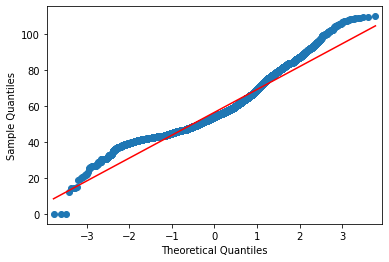

In [38]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(df_test['rougher_input_feed_size'], line='s')
pyplot.show

qqplot(df_short_train['rougher_input_feed_size'], line='s')
pyplot.show


Значения имеют небольшие хвосты слева и справа, и также в левом нижнем углу значения становятся разреженными. 

 На основе данных графика можно сделать вывод, что значения  подчиняются нормальному закону распределения.

**Найдем суммарную концентрацию металлов на разных стадиях**

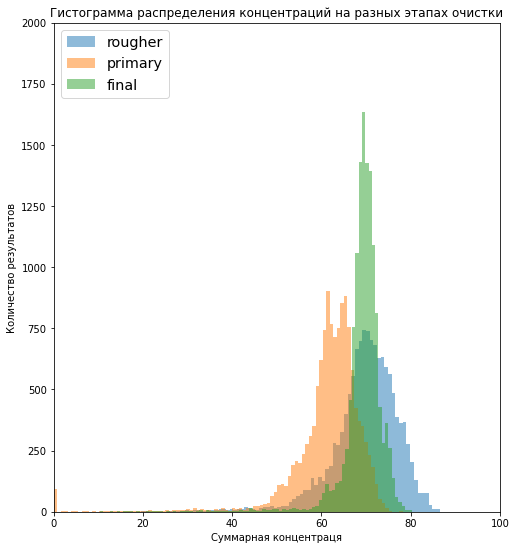

In [39]:
final_sum_df_train = (df_train['final_output_concentrate_au'] + 
                      df_train['final_output_concentrate_ag'] + 
                      df_train['final_output_concentrate_pb'] +
                      df_train['final_output_concentrate_sol'])

primary_sum_df_train = (df_train['primary_cleaner_output_concentrate_au'] + 
                        df_train['primary_cleaner_output_concentrate_ag'] + 
                        df_train['primary_cleaner_output_concentrate_pb'] +
                        df_train['primary_cleaner_output_concentrate_sol'])

rougher_sum_df_train = (df_train['rougher_output_concentrate_au'] + 
                        df_train['rougher_output_concentrate_ag'] + 
                        df_train['rougher_output_concentrate_pb'] +
                        df_train['rougher_output_concentrate_sol'])

plt.figure(figsize=[8,9])

plt.hist(rougher_sum_df_train, bins=100, label = 'rougher', alpha=.5)
plt.hist(primary_sum_df_train, bins=100, label = 'primary', alpha=.5)
plt.hist(final_sum_df_train, bins=100, label = 'final', alpha=.5)

plt.xlim([0, 100])
plt.ylim([0, 2000])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

Суммарная концентрация в финальном результате максимальная. К этому и стремится производство. С технологическим процессом связано снижение суммарной концентрации после флотации: отделяется черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.



**Вывод**

В результате анализа были наглядно изучены:

- концетрации основных веществ на разных этапах очистки: 
  концентрация золота с каждым этапом растет, 
  серебра падает, 
  свинца постепенно растет и стабилизируется;
- размер гранул тестовой и обучающей выборки: распределения не отличаются друг от друга;
- суммарная концентрация веществ по этапам ведет себя соответственно технологическому процессу.

Данные готовы к обучению модели.

## Модель

Подготовим функцию для вычисления итоговой sMAPE.

Нужно спрогнозировать сразу две величины:
- эффективность обогащения чернового концентрата rougher.output.recovery;
- эффективность обогащения финального концентрата final.output.recovery.

In [40]:
def calculate_smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    
    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100 
    
    
def calculate_final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher_output_recovery']
    target_actual_final = target_actual['final_output_recovery']
    
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    
    return 0.25 * calculate_smape(target_actual_rougher, target_predictions_rougher) \
        + 0.75 * calculate_smape(target_actual_final, target_predictions_final)

Создадим scorer для того, чтобы использовать его при кросс-валидации

In [41]:
smape_scorer = make_scorer(calculate_final_smape, greater_is_better=False)

Перед нами стоит задача регресии, значит отберем следующие модели для обучения:
- Линейная регрессия,
- Дерево решений, 
- Случайный лес.

**Выполним поиск лучшей модели для предсказаний**

**Линейная регрессия**

In [42]:
model = LinearRegression()
model.fit(features_train, target_train)
smape = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_scorer).mean()
print('Лучшее значение sMAPE для линейной регрессии:', -smape)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

Лучшее значение sMAPE для линейной регрессии: 8.732615385478047


**Дерево решений**

In [43]:
param_grid = {'max_depth': range(2, 11)}

model = DecisionTreeRegressor(random_state=state)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
print('Лучшее значение sMAPE для дерева решений: {} при значениях гиперпараметров: {}'.format(
    -search.best_score_, 
    search.best_params_)
     )

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

Лучшее значение sMAPE для дерева решений: 8.789402632768814 при значениях гиперпараметров: {'max_depth': 2}


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


**Случайный лес**

In [44]:
param_grid = {'n_estimators': range(60, 101, 10)}

model = RandomForestRegressor(max_depth=2, random_state=state)
search = GridSearchCV(model, param_grid, cv=5, scoring=smape_scorer)
search.fit(features_train, target_train)
print('Лучшее значение sMAPE для случайного леса: {} при значениях гиперпараметров: {}'.format(
    -search.best_score_, search.best_params_))


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/opt/conda/lib/python3.9/sit

Лучшее значение sMAPE для случайного леса: 8.48240542539141 при значениях гиперпараметров: {'n_estimators': 90}


Лучшей моделью с наименьшим sMAPE оказался **Случайный лес**. Проверим ее качество на тестовой выборке.

In [45]:
model = RandomForestRegressor(max_depth=2,n_estimators=90, random_state=state)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

print('sMAPE для тестовых данных:', calculate_final_smape(target_test, predictions_test))

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:514: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


sMAPE для тестовых данных: 10.940518919013577


# Вывод

Подготовлен прототип модели машинного обучения для эффективной работы промышленного предприятия компании «Цифра».Модель предсказывает коэффициент восстановления золота из золотосодержащей руды. 
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

В ходе работы над проектом были:
-проанализированны и обработаны исходные данные;
-построены несколько моделей, 
-оценено качество моделей и выбрана лучшая.

Случайный лес  с гиперпараметрами max_depth=2 и n_estimators=90 дал наилучшее значение sMAPE среди других моделей.
На тестовой выборке случайный лес предсказал значения целевых признаков rougher_output_recovery и final_output_recovery с sMAPE 10,95